In [67]:
import numpy as np 
import pandas as pd
df = pd.read_csv("Breast cancer Wisconsin data set.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
missing = df.isnull()
missing.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
missing = df.isnull()
missing.head(5)
for column in missing.columns.values.tolist():
    print(column)
    print (missing[column].value_counts())
    print("")  

diagnosis
False    569
Name: diagnosis, dtype: int64

radius_mean
False    569
Name: radius_mean, dtype: int64

texture_mean
False    569
Name: texture_mean, dtype: int64

perimeter_mean
False    569
Name: perimeter_mean, dtype: int64

area_mean
False    569
Name: area_mean, dtype: int64

smoothness_mean
False    569
Name: smoothness_mean, dtype: int64

compactness_mean
False    569
Name: compactness_mean, dtype: int64

concavity_mean
False    569
Name: concavity_mean, dtype: int64

concave points_mean
False    569
Name: concave points_mean, dtype: int64

symmetry_mean
False    569
Name: symmetry_mean, dtype: int64

fractal_dimension_mean
False    569
Name: fractal_dimension_mean, dtype: int64

radius_se
False    569
Name: radius_se, dtype: int64

texture_se
False    569
Name: texture_se, dtype: int64

perimeter_se
False    569
Name: perimeter_se, dtype: int64

area_se
False    569
Name: area_se, dtype: int64

smoothness_se
False    569
Name: smoothness_se, dtype: int64

compactness_se

In [17]:
df['diagnosis'].value_counts().to_frame()

,diagnosis
B,357
M,212


In [18]:
import itertools 
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing

In [19]:
table= df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

#normalisation
table = preprocessing.StandardScaler().fit(table).transform(table.astype(float))
table[0:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [21]:
diagnosis_list=df["diagnosis"].values

In [45]:
#Splitting data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( table, diagnosis_list, test_size=0.3, random_state=45)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (398, 30) (398,)
Test set: (171, 30) (171,)


In [68]:
#Training and predction - KNN
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
prediction = knn.predict(X_test)
prediction[0:10]

array(['B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B'], dtype=object)

In [47]:
#Accuracy of prediction
from sklearn import metrics
print("Training set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, prediction))

Training set Accuracy:  0.9748743718592965
Test set Accuracy:  0.9590643274853801


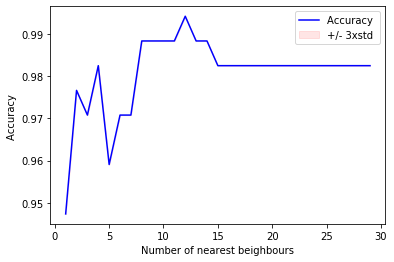

In [57]:
#Optimum value of K
import matplotlib.pyplot as plt
K = 30
mean = np.zeros((K-1))
stdev = np.zeros((K-1))
ConfustionMx = [];
for i in range(1,K):
    
    #Training and Prediction 
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    prediction=knn.predict(X_test)
    mean[i-1] = metrics.accuracy_score(y_test, prediction)
    
#Plotting accuracy for different k
plt.plot(range(1,K),mean,'b')
plt.fill_between(range(1,K),mean - 1 * stdev,mean + 1 * stdev, alpha=0.10,color ='r')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of nearest beighbours')
plt.show()

In [43]:
print( "The best accuracy using KNN algorithm was ", mean.max(), "with k=", mean.argmax()+1) 

The best accuracy using KNN algorithm was  0.9941520467836257 with k= 12


In [65]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
prediction_nb = nb.predict(X_test)
prediction_nb[0:10]

array(['B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M'], dtype='<U1')

In [49]:
print("Naive Bayes accuracy: ",nb.score(X_test, y_test))

Naive Bayes accuracy:  0.9298245614035088


In [64]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)
prediction_log = log.predict(X_test)
prediction_log[0:10]

array(['B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B'], dtype=object)

In [56]:
from sklearn.metrics import accuracy_score
print ("Accuracy of Logistic regression: ", accuracy_score(y_test, prediction_log))

Accuracy of Logistic regression:  0.9649122807017544


In [63]:
#Support Vector Machines
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state = 1)
svm.fit(X_train,y_train)
prediction_svm = svm.predict(X_test)
prediction_svm[0:10]

array(['B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M'], dtype=object)

In [60]:
print ("Accuracy using Support Vector Machines: ", accuracy_score(y_test, prediction_svm))

Accuracy using Support Vector Machines:  0.9766081871345029
